## Modules

In [2]:
import os

import math
import matplotlib.pyplot as plt
import numpy as np

import cv2

cv2.__version__

'4.7.0'

## Class

In [3]:
class blood_smear():

    def __init__(
        self, 
        directory,
        sample,
        lower = np.array([130,146,70]),
        upper = np.array([255,255,180]),
        kernal = np.ones((3,3), np.uint8)
    ):
                                  
        self.files = [
             os.path.join(root, name) 
             for root, dirs, files in os.walk(directory) 
             for name in files
             if name.endswith(".jpg")
             ]
        self.s = sample
        self.kernal = kernal
        self.lower = lower
        self.upper = upper
             
            
    @property
    def plot(self):
        return plt.imshow(self.raw[0])
    
    @property
    def raw(self):
        return [cv2.imread(file) for file in self.files[:self.s]]
    
    @property
    def blurred(self):
        return [cv2.GaussianBlur(image,(5,5),0) for image in self.raw]
    
    @property
    def masked(self):   
        return [cv2.inRange(cv2.cvtColor(image, cv2.COLOR_LBGR2LAB), self.lower, self.upper)
                for image in self.blurred]

    @property
    def morphed(self):
        return [cv2.morphologyEx(image, cv2.MORPH_OPEN, self.kernal, iterations = 2) 
                for image in self.masked]
        
    @property
    def dilated(self):
        return [cv2.dilate(image, self.kernal, iterations = 3) 
                for image in self.morphed]
    
    @property                
    def contours(self):
        contours = []
        for image in self.dilated:
            contour, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            contours.append(contour)
        return contour
                 
    def remove_debris():
        pass
    
    def find_wbc():
        pass
    
    def find_platelets():
        pass

    def draw_contours():
        pass
    
    def save_files():
        pass
    
    
    
    def process(self):
        for j in range(len(self.raw)):
            # print table of contours and sizes
            print("Found %d objects." % len(self.contours[j]))
            for (i, c) in enumerate(self.contours[j]):
                print("\tSize of contour %d: %d" % (i, len(c)))
                if(len(c)<162):
                    #self.contours[j].remove(c)
                    cv2.drawContours(self.masked[j], [c], -1, 0, -1)
                    cv2.drawContours(self.dilated[j], [c], -1, (0,255,0), 3)
            wbc = cv2.bitwise_and(self.dilated[j],self.dilated[j],mask=self.masked[j])
            platelets = self.dilated[j] - wbc
    
            #Removing the debris
            contours, _ = cv2.findContours(platelets, cv2.RETR_EXTERNAL, 
            cv2.CHAIN_APPROX_SIMPLE)

            # print table of contours and sizes
            print("Found %d objects." % len(contours))
            for (i, c) in enumerate(self.contours[j]):
                print("\tSize of contour %d: %d" % (i, len(c)))
                if(len(c)<18):
                    #self.contours[j].remove(c)
                    cv2.drawContours(self.masked[j], [c], -1, 0, -1)
                    cv2.drawContours(self.dilated[j], [c], -1, (0,255,0), 3)
            platelets_final = cv2.bitwise_and(platelets,platelets,mask=self.masked[j])

            #Convex hull for wbc
            contours, hierarchy = cv2.findContours(wbc, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

            hull = []

            for i in range(len(contours)):
                hull.append(cv2.convexHull(contours[i], False))

            drawing = np.zeros((wbc.shape[0], wbc.shape[1], 3), np.uint8)

            for i in range(len(contours)):
                color_contours = (0,255,0)
                color = (255,255,255)
                cv2.drawContours(drawing, contours, i, color_contours, 2, 8, hierarchy)
                cv2.drawContours(drawing, hull, i, color, 2, 8)
            cv2.imshow('WBC',wbc)
            cv2.imshow('WBC Hull',drawing)
            cv2.imshow('platelets',platelets)

            contours, _ = cv2.findContours(platelets_final, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            for (i, c) in enumerate(contours):
                cnt = contours[i]   
                x,y,z = cv2.minAreaRect(cnt)
                aspect_ratio = y[0]/y[1]
                if(aspect_ratio<0.65 or aspect_ratio>1.35):
                    contours.remove(c)
                    cv2.drawContours(self.masekd[j], [c], -1, 0, -1)
                    cv2.drawContours(self.dilated[j], [c], -1, (0,255,0), 3)
            platelets_shaped = cv2.bitwise_and(platelets_final,platelets_final,mask=self.masked[j])

            # Convex hull for platelets
            contours, hierarchy = cv2.findContours(platelets_shaped, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

            hull2 = []

            for i in range(len(contours)):
                hull2.append(cv2.convexHull(contours[i], False))

            drawing2 = np.zeros((platelets_shaped.shape[0], platelets_shaped.shape[1], 3), np.uint8)

            for i in range(len(contours)):
                color_contours = (0,255,0)
                color = (255,255,255)
                cv2.drawContours(drawing2, contours, i, color_contours, 2, 8, hierarchy)
                cv2.drawContours(drawing2, hull2, i, color, 2, 8)
                
            cv2.imwrite('WBC/' + self.files[j], drawing)
            cv2.imwrite('PLATELETS/' + self.files[j], drawing2)
            
            

In [ ]:
images = blood_smear('ThickBloodSmears_150', 1)
images.process()
cv2.waitKey(0)
cv2.destroyAllWindows()

Found 7 objects.
	Size of contour 0: 1
	Size of contour 1: 1
	Size of contour 2: 1
	Size of contour 3: 1
	Size of contour 4: 1
	Size of contour 5: 1
	Size of contour 6: 1
Found 635 objects.
	Size of contour 0: 1
	Size of contour 1: 1
	Size of contour 2: 1
	Size of contour 3: 1
	Size of contour 4: 1
	Size of contour 5: 1
	Size of contour 6: 1


# Archive

In [171]:
masks = images.masked
dilated = images.dilated
contours = images.contours

contoured_images = []
for j in range(len(masks)-1):
    for (i, c) in enumerate(contours[i]):
        #print("\tSize of contour %d: %d" % (i, len(c)))
        if(len(c)<162):
            #contours.remove(c)
            cv2.drawContours(masks[j], [c], -1, 0, -1)
            #cv2.drawContours(final, [c], -1, (0,255,0), 3)
    wbc = cv2.bitwise_and(dilated[j],dilated[j],mask=masks[j])
    platelets = dilated[j] - wbc
    
    contoured_images.append(platelets)

In [185]:
def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10, 10))
    
    for ind, title in zip(range(len(figures)), figures):
        ax.ravel()[ind].imshow(figures[title], cmap=plt.jet())
        ax.ravel()[ind].set_title(title)
        ax.ravel()[ind].set_axis_off()

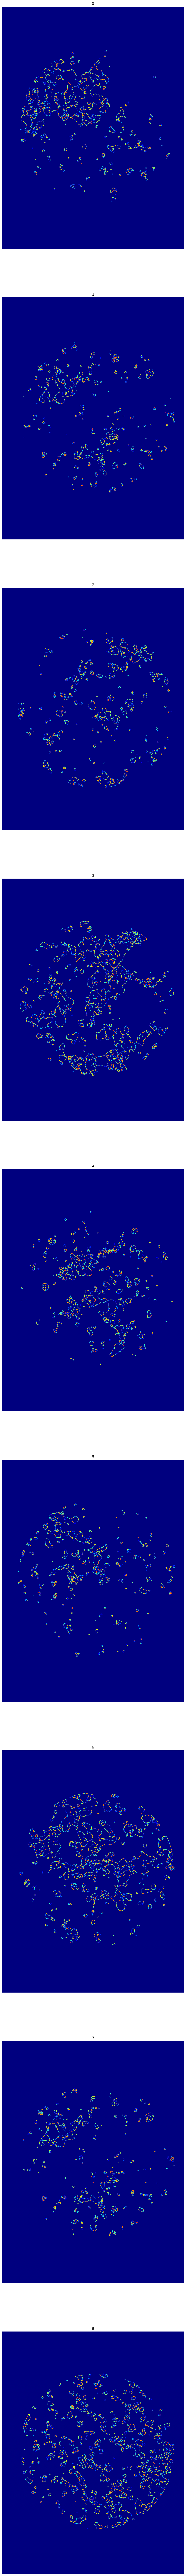

In [187]:
plot_figures(dict(enumerate(contoured_images)), 
    nrows = 9, 
    ncols = 1
)


In [ ]:
plot_figures(dict(enumerate(images.raw)), 
    nrows = 8, 
    ncols = 1
)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>                                                                                      │
│                                                                                                  │
│ ❱ 1 plot_figures(dict(enumerate(images.raw)),                                                    │
│   2 │   nrows = 8,                                                                               │
│   3 │   ncols = 1                                                                                │
│   4 )                                                                                            │
│                                                                                                  │
│ in plot_figures                                                                                  │
│                                                                                                  │
│   11 │   fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(150, 150))                    │
│   12 │                                                                                           │
│   13 │   for ind, title in zip(range(len(figures)), figures):                                    │
│ ❱ 14 │   │   ax.ravel()[ind].imshow(figures[title], cmap=plt.jet())                              │
│   15 │   │   ax.ravel()[ind].set_title(title)                                                    │
│   16 │   │   ax.ravel()[ind].set_axis_off()                                                      │
│   17                                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
IndexError: index 8 is out of bounds for axis 0 with size 8